# Interpolation de Lagrange

In [1]:
import os
os.chdir("C:/tests python")

In [2]:
# Définition d'un polynome interpolateur de lagrange de degré 2

def Lagrange_2(X,Y):
    
    figure(figsize=(10,7.5), dpi=100)
    
    scatter(X,Y)
    
    alpha = X[0]
    beta = X[1]
    gamma = X[2]
    a = Y[0]
    b = Y[1]
    c = Y[2]
    bas = min(Y)
    haut = max(Y)
    
    x = linspace(alpha,gamma,100)
    Lag0 = ((x-beta)*(x-gamma))/((alpha - beta)*(alpha - gamma))
    Lag1 = ((x-alpha)*(x-gamma))/((beta - alpha)*(beta - gamma))
    Lag2 = ((x-alpha)*(x-beta))/((gamma - beta)*(gamma - alpha)) 
    y = (a*Lag0) + (b*Lag1) + (c*Lag2)
    
    xpetit = alpha - 0.5
    xgrand = gamma + 0.5
    ypetit = bas - 0.5
    ygrand = haut + 0.5
    xlim(xpetit,xgrand)
    ylim(ypetit,ygrand)
    plot(x,y)
    grid()
    title('Interpolation de Lagrange de trois points')
    show()

In [3]:
from math import *
from pylab import *
L=[-2,1,4]
M=[-3,8,2]
Lagrange_2(L,M)


<Figure size 1000x750 with 1 Axes>

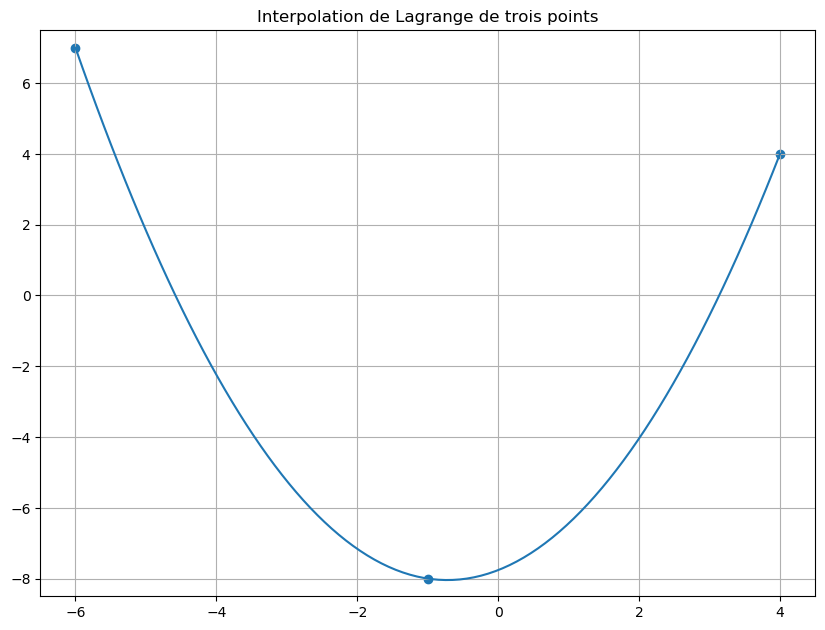

In [4]:
from math import *
from pylab import *
L=[-6,-1,4]
M=[+7,-8,4]
Lagrange_2(L,M)


In [58]:
# Définition d'un polynome interpolateur de lagrange de degré adapté au nuage de points

def Interpol_Lagrange(X,Y):
    
    figure(figsize=(10,7.5), dpi=100)
    
    scatter(X,Y)                          # dessine le nuage de points
    alpha = X[0]
    omega = X[-1]
    bas = min(Y)
    haut = max(Y)
    n = len(X)                            # nb de coordonnées dans les listes = nb de polynomes de Lagrange
    
    x = linspace(alpha,omega,100)
    y = 0
    
    for i in range(n):
        if i==0:
            Lag = 1
            for k in range(1,n):
                Lag = Lag*((x-X[k])/(X[0]-X[k]))
        else:
            Lag = 1
            for k in range(0,i):
                Lag=Lag*((x-X[k])/(X[i]-X[k]))
            for k in range(i+1,n):
                Lag=Lag*((x-X[k])/(X[i]-X[k]))
        
        y = y + M[i]*Lag
    
    xpetit = alpha - 0.5
    xgrand = omega + 0.5
    ypetit = bas - 0.5
    ygrand = haut + 0.5
    xlim(xpetit,xgrand)
    ylim(ypetit,ygrand)
  
    plot(x,y)
    axis("equal")
    grid()
    title('Interpolation de Lagrange')
    show()

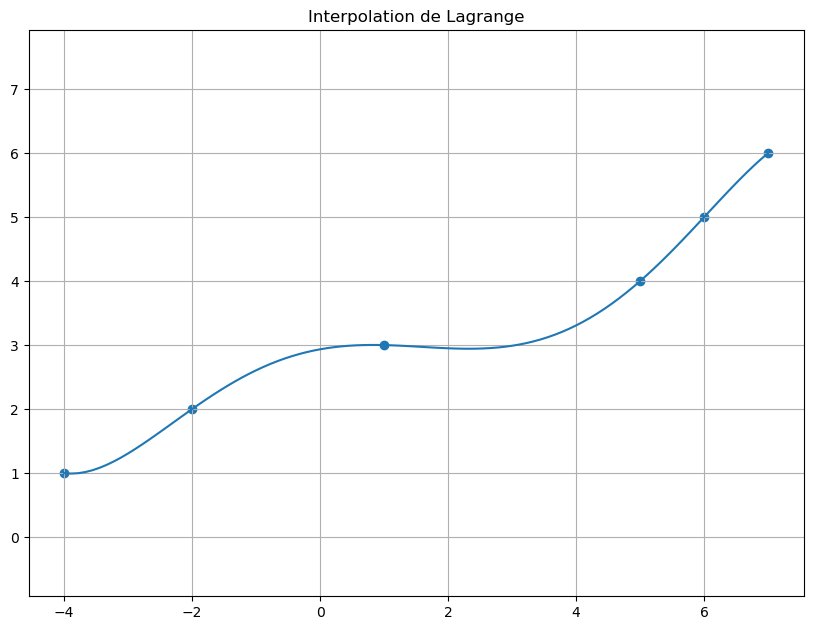

In [59]:
L=[-4,-2,1,5,6,7]                        # On prend garde à trier les abscisses dans l'ordre croissant
M=[1,2,3,4,5,6]
Interpol_Lagrange(L,M)

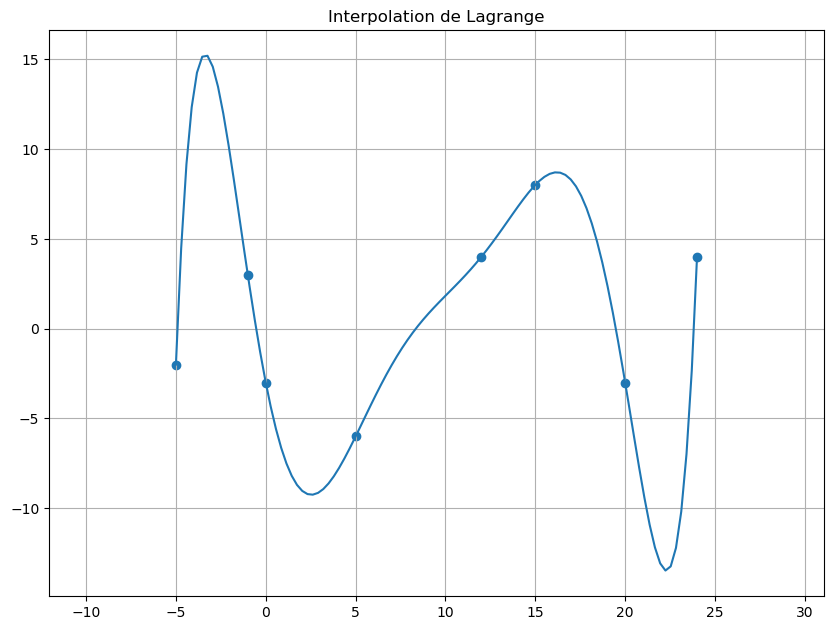

In [60]:
L=[-5,-1, 0, 5, 12, 15, 20, 24]
M=[-2, 3, -3, -6, 4, 8, -3, 4]
Interpol_Lagrange(L,M)

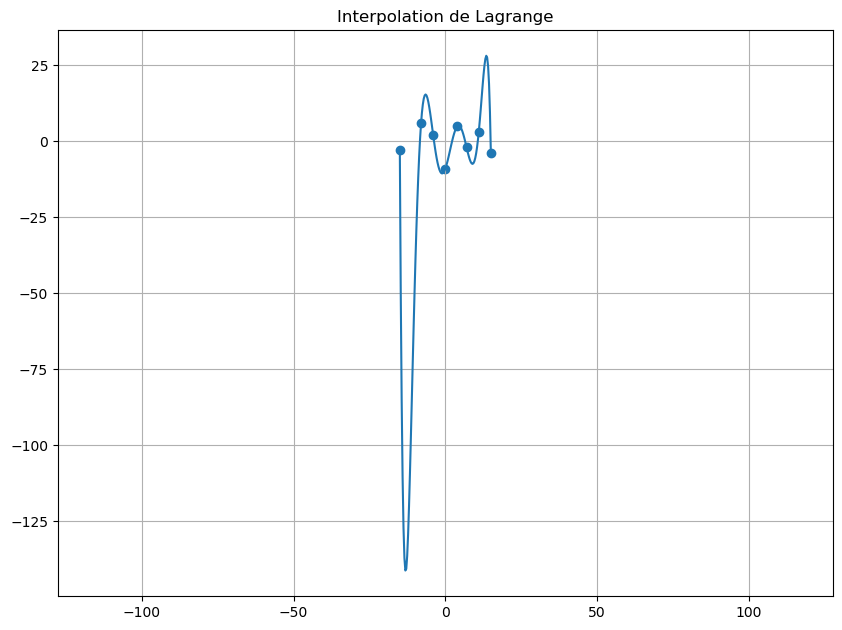

In [61]:
L = [-15, -8, -4, 0, 4, 7, 11, 15]
M = [-3, 6, 2, -9, 5, -2, 3, -4]
Interpol_Lagrange(L,M)

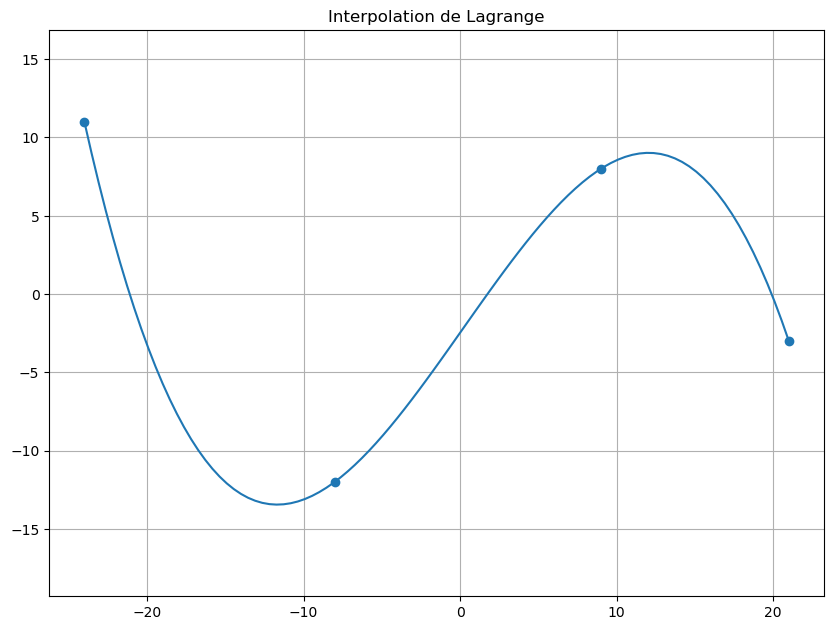

In [62]:
L=[-24,-8, 9, 21]                               # Les polynômes de Lagranges aiment les valeurs espacées
M=[11, -12, 8, -3]
Interpol_Lagrange(L,M)

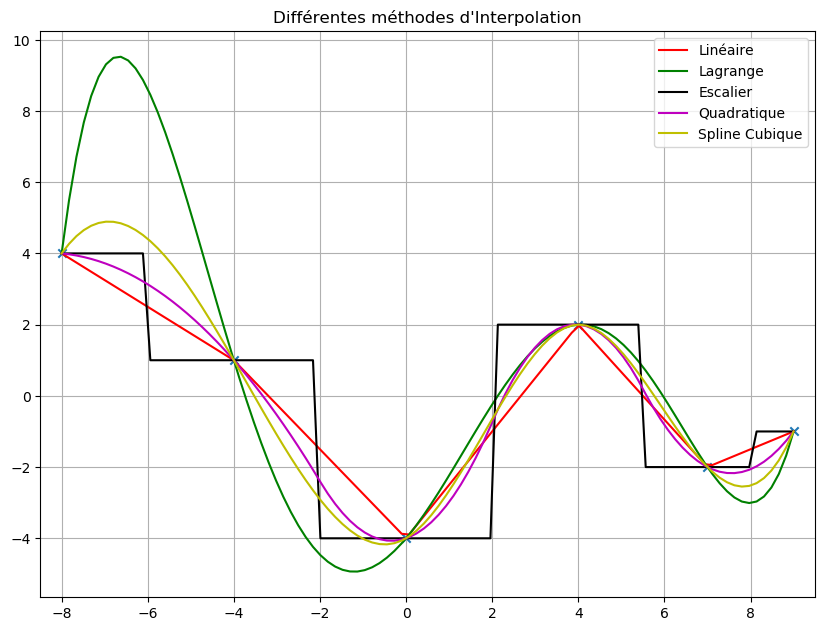

In [10]:
from math import *
from pylab import *
from scipy import interpolate
import numpy as np


figure(figsize=(10,7.5), dpi=100)

L = [ -8, -4, 0, 4, 7, 9]
M = [ 4, 1, -4, 2, -2, -1]

scatter(L,M, marker='x')

petitx=L[0]
grandx=L[-1]
x = linspace (petitx,grandx, 100)

y = np.interp(x,L,M)

a = interpolate.barycentric_interpolate(L, M, x)     # Polynôme de Lagrange

b = interpolate.interp1d(L, M, kind = "nearest")     # fontion en escalier
v = b(x)

c = interpolate.interp1d(L, M, kind = "quadratic")   # Spline d'ordre 2
w = c(x)

d = interpolate.interp1d(L, M, kind = "cubic")       # Spline d'ordre 3
z = d(x)

plot(x,y,'r-')
plot(x,a,'g')
plot(x,v,'k')
plot(x,w,'m')
plot(x,z,'y')

haut = grandx + 0.5
bas = petitx - 0.5
xlim(bas,haut)
title("Différentes méthodes d'Interpolation")
legend(("Linéaire","Lagrange", "Escalier","Quadratique","Spline Cubique"), loc='upper right') 
grid()
savefig('differinterpolspython.png')
show()

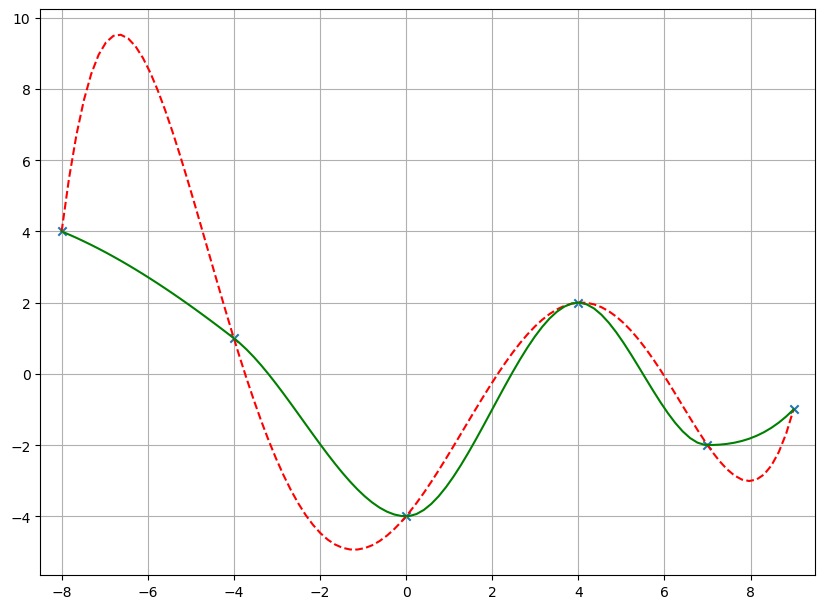

In [11]:
from math import *
from pylab import *
from scipy import interpolate
import numpy as np


figure(figsize=(10,7.5), dpi=100)

L = [ -8, -4, 0, 4, 7, 9]
M = [ 4, 1, -4, 2, -2, -1]

scatter(L,M, marker='x')

petitx=L[0]
grandx=L[-1]
x = linspace (petitx,grandx, 100)

y = interpolate.krogh_interpolate(L, M, x)
a = interpolate.pchip_interpolate(L, M, x)
haut = grandx + 0.5
bas = petitx - 0.5
xlim(bas,haut)
plot(x,y,'r--')
plot(x,a,'g')

grid()
show()

In [31]:
# Définition d'un polynome interpolateur de lagrange de degré n adapté au nuage de points de taille n+1

def Interpol_Lagrange_n(x,X,Y):
    
    alpha = X[0]
    omega = X[-1]
    bas = min(Y)
    haut = max(Y)
    n = len(X)              # le nb de coordonnées dans les listes = le nb de polynomes de Lagrange = leur degré est n-1 
    
    y = 0
    
    for i in range(n):
        if i==0:
            Lagr = 1
            for k in range(1,n):
                Lagr = Lagr*((x-X[k])/(X[0]-X[k]))
        else:
            Lagr = 1
            for k in range(0,i):
                Lagr = Lagr*((x-X[k])/(X[i]-X[k]))
            for k in range(i+1,n):
                Lagr = Lagr*((x-X[k])/(X[i]-X[k]))
        
        y = y + M[i]*Lagr
    return y

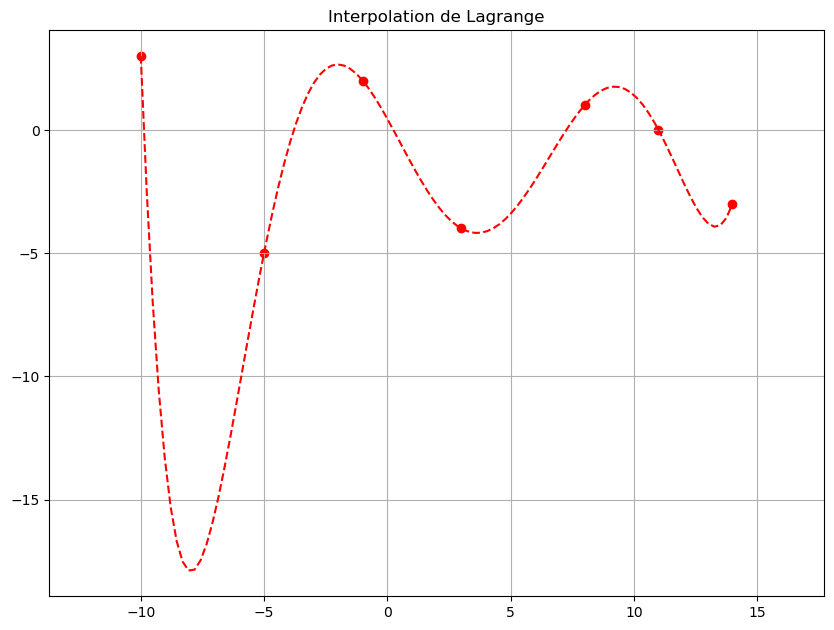

In [32]:
from pylab import *

L=[-10,-5,-1,3,8,11,14]
M=[3,-5,2,-4,1,0,-3]

alpha = L[0]
omega = L[-1]
bas = min(M)
haut = max(M)

x = linspace(alpha,omega,100)
y=Interpol_Lagrange_n(x,L,M)

figure(figsize=(10,7.5), dpi=100)
scatter(L,M,c='r', marker='o')

xpetit = alpha - 0.5
xgrand = omega + 0.5
ypetit = bas - 0.5
ygrand = haut + 0.5
xlim(xpetit,xgrand)
ylim(ypetit,ygrand)
plot(x,y, 'r--')
axis("equal")
grid()
title('Interpolation de Lagrange')
savefig('lagrangeordre6.png')
show()

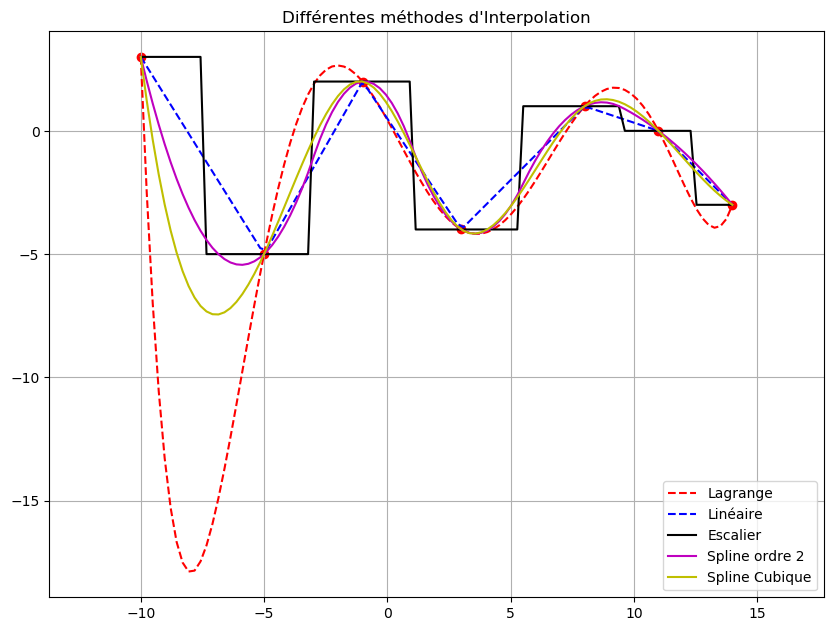

In [33]:
from pylab import *
from scipy import interpolate
import numpy as np

L=[-10,-5,-1,3,8,11,14]
M=[3,-5,2,-4,1,0,-3]

alpha = L[0]
omega = L[-1]
bas = min(M)
haut = max(M)

x = np.linspace(alpha,omega,100)
y = Interpol_Lagrange_n(x,L,M)

figure(figsize=(10,7.5), dpi=100)
scatter(L,M,c='r', marker='o')


t = np.interp(x,L,M)

b = interpolate.interp1d(L, M, kind = "nearest")
v = b(x)

c = interpolate.interp1d(L, M, kind = "quadratic")
w = c(x)

d = interpolate.interp1d(L, M, kind = "cubic")
z = d(x)

xpetit = alpha - 0.5
xgrand = omega + 0.5
ypetit = bas - 0.5
ygrand = haut + 0.5
xlim(xpetit,xgrand)
ylim(ypetit,ygrand)

plot(x,y, 'r--')
plot(x,t,'b--')
plot(x,v,'k')
plot(x,w,'m')
plot(x,z,'y')

title("Différentes méthodes d'Interpolation")
legend(("Lagrange","Linéaire", "Escalier","Spline ordre 2","Spline Cubique"), loc='lower right') 
axis("equal")
grid()
savefig('compardifferinterpolspython.png')
show()

Pour Python l'interpolation barycentrique est celle de Lagrange !!!

# Phénomènes de Runge

## Exemple canonique avec la fonction $f$ où $f(x)=\frac{1}{1+x^2}$

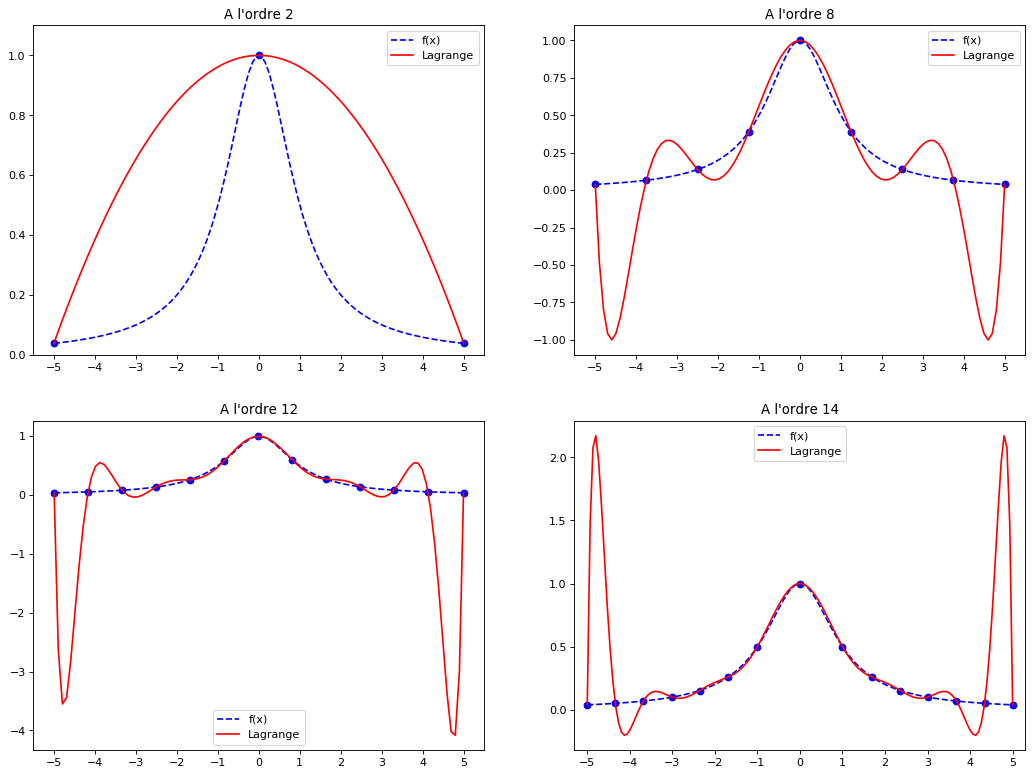

In [39]:
# Phénomène de Runge

from pylab import *
from decimal import *

figure(figsize=(16,12), dpi=80)

def f(x):
    y = 1/(1+x**2)
    return y

# avec trois points
subplot(2,2,1)
L = [-5,0,5]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,100)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')

xlim(-5.5,5.5)
ylim(0,1.1)
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper right')
title("A l'ordre 2")

# avec neuf points
subplot(2,2,2)
L = [-5 + 1.25*i for i in range(9)]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,100)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
ylim(-1.1,1.1)
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper right')
title("A l'ordre 8")

# avec treize points
subplot(2,2,3)
L = [-5 + 0.83*i for i in range(12)]
L.append(5)
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,100)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='lower center')
title("A l'ordre 12")

# avec quinze points
subplot(2,2,4)
L = [-5, -4.34, -3.68, -3, -2.36, -1.7, -1, 0, 1, 1.7, 2.36, 3, 3.68, 4.34, 5]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,150)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xticks(np.linspace(-5,5,11,endpoint=True))
xlim(-5.3,5.3)
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper center')
title("A l'ordre 14")

savefig('Runge.png')
show()


# Polynômes de Tchebychev

Combien de points de Chebyschev ?18


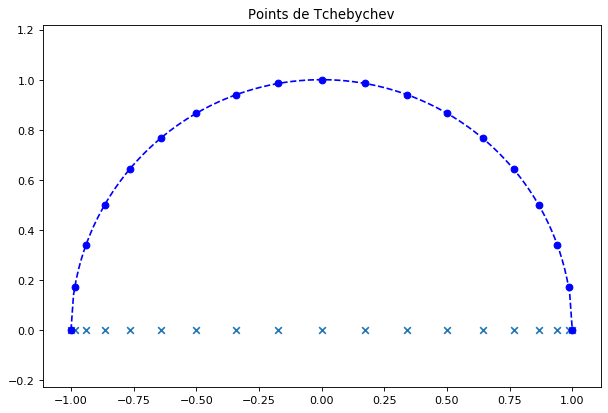

In [35]:
# Points de Tchebychev

from math import *
from pylab import *
figure(figsize=(9,6), dpi=80)
n=int(input('Combien de points de Chebyschev ?'))

L=[cos(pi*k/n) for k in range (n+1)]
M=[0 for a in L]
N=[sqrt(1-a**2) for a in L]

scatter(L,M, marker='x')
scatter(L,N, c='b',marker='o')

x=linspace(-1,1,200)
y=sqrt(1-x**2)

title("Points de Tchebychev")
plot(x,y,'b--')
axis('equal')
savefig('pointsdechebyschev.png')
show()

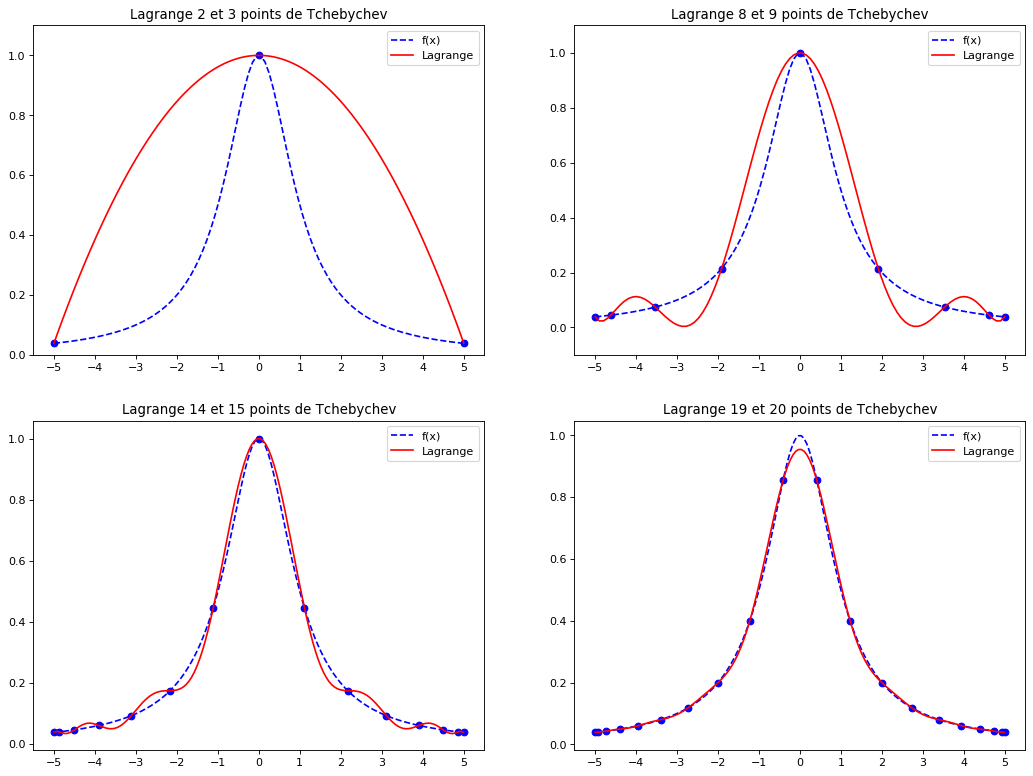

In [40]:
# Atténuation du Phénomène de Runge avec les points de Tchebychev

from pylab import *
from decimal import *

figure(figsize=(16,12), dpi=80)

def f(x):
    y = 1/(1+x**2)
    return y

# avec trois points de Chebyschev
subplot(2,2,1)
L=[5*cos(pi*k/2) for k in range (3)]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,100)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xlim(-5.5,5.5)
ylim(0,1.1)
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper right')
title("Lagrange 2 et 3 points de Tchebychev")

# avec neuf points
subplot(2,2,2)
L=[5*cos(pi*k/8) for k in range (9)]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,100)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xticks(np.linspace(-5,5,11,endpoint=True))
ylim(-0.1,1.1)
legend(("f(x)","Lagrange"), loc='upper right')
title("Lagrange 8 et 9 points de Tchebychev")

# avec quinze points
subplot(2,2,3)
L=[5*cos(pi*k/14) for k in range (15)]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,150)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper right')
title("Lagrange 14 et 15 points de Tchebychev")

# avec vingt points
subplot(2,2,4)
L=[5*cos(pi*k/19) for k in range (20)]
M = [f(i) for i in L]
scatter(L,M,c='b',marker='o')
x = linspace(-5,5,150)
z = f(x)
u = Interpol_Lagrange_n(x,L,M)
plot(x,z,'b--')
plot(x,u,'r')
xticks(np.linspace(-5,5,11,endpoint=True))
legend(("f(x)","Lagrange"), loc='upper right')
title("Lagrange 19 et 20 points de Tchebychev")

savefig('Runge_Tchebychev.png')
show()


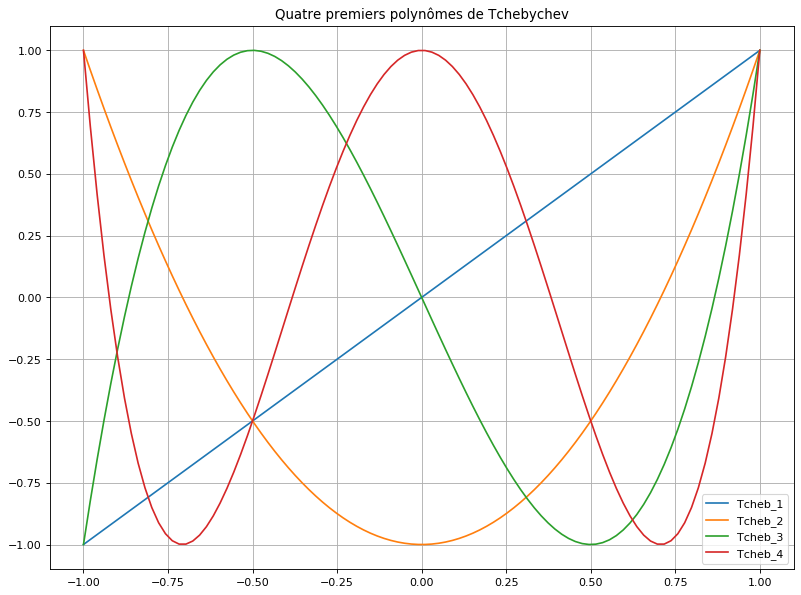

In [30]:
# Calcul des 4 premiers polyn^omes
from math import *
from pylab import *

figure(figsize=(12,9), dpi=80)

x = linspace(-1,1,100)
i = 1
chebObj_ = []
chebPol_ = []
while i<5: 
    chebOrd_ = np.array([0]*i+[1])
    chebObj_.append(np.polynomial.chebyshev.Chebyshev(chebOrd_))
    chebPol_.append(np.polynomial.chebyshev.cheb2poly(chebObj_[-1].coef))
    plot(x,np.polyval(chebPol_[-1][::-1],x),label="Tcheb_" + str(i))
    i += 1
grid()
title ("Quatre premiers polynômes de Tchebychev")
legend()
savefig('poly_Tchebychev.png')
show()